#### Import necessary libraries

In [231]:
import brawlstats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns

#### Load data into DataFrame

In [232]:
# Do not share your API token publicly
token = ''

client = brawlstats.Client(token)

top_players = client.get_rankings(ranking='players', limit=200)
lookup = [client.get_player(player['tag']) for player in top_players]

club_tags = []
for x in lookup:
    if len(x.club) == 0:
        club_tags.append(None)
    if x.get_club() is not None:
        a = dict(x.get_club())
        club_tags.append(a['tag'])

club_names = []
for x in lookup:
    if len(x.club) == 0:
        club_names.append(None)
    if x.get_club() is not None:
        a = dict(x.get_club())
        club_names.append(a['name'])

df = pd.DataFrame({'tag': [x.tag for x in lookup], 'name': [x.name for x in lookup], 
                   'name_color': [x.name_color for x in lookup], 'trophies': [x.trophies for x in lookup], 
                   'highest trophies': [x.highest_trophies for x in lookup], 
                   'power_play_points': [x.power_play_points for x in lookup], 
                   'highest_power_play_points': [x.highest_power_play_points for x in lookup],
                   'exp_level': [x.exp_level for x in lookup], 'exp_points': [x.exp_points for x in lookup], 
                   'is_qualified_from_championship_challenge': [x.is_qualified_from_championship_challenge for x in lookup], 
                   'x3vs3_victories': [x.x3vs3_victories for x in lookup], 'team_victories': [x.team_victories for x in lookup],
                   'solo_victories': [x.solo_victories for x in lookup], 'duo_victories': [x.duo_victories for x in lookup],
                   'best_robo_rumble_time': [x.best_robo_rumble_time for x in lookup],
                   'best_time_as_big_brawler': [x.best_time_as_big_brawler for x in lookup],
                   'club_tag': club_tags, 'club_name': club_names,
                   'brawlers': [x.brawlers for x in lookup],
                   'battle_log': [client.get_battle_logs(x['tag'])[0:25] for x in lookup]})

df.to_csv('Brawl_Stars_Data.csv')
df.head()

    


,tag,name,name_color,trophies,highest trophies,power_play_points,highest_power_play_points,exp_level,exp_points,is_qualified_from_championship_challenge,x3vs3_victories,team_victories,solo_victories,duo_victories,best_robo_rumble_time,best_time_as_big_brawler,club_tag,club_name,brawlers,battle_log
0,#VCC2PP8L,sqmmee,0xffcb5aff,56732,56732,None,1290.0,335,569798,False,38014,38014,2416,1541,6,0,#2GV80YC00,YT : sqmmee,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...","[{'battle_time': '20211228T081732.000Z', 'even..."
1,#2G0GR9,꧁༺Eend༻꧂,0xff1ba5f5,56212,56212,None,1362.0,382,741690,False,43843,43843,5666,3576,20,0,#2GYPJQ82C,<c5>Just Us</c>,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...","[{'battle_time': '20211227T140318.000Z', 'even..."
2,#PR9U2JL,VTR|JuanCarlos,0xfff9c908,56020,59425,None,1156.0,324,535383,False,37947,37947,1566,2972,6,0,#2PL28P0CQ,Tribe Gaming NA,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...","[{'battle_time': '20211228T050427.000Z', 'even..."
3,#8LQ9JR82,Eqwaak 犬,0xffff8afb,55732,64000,None,1340.0,371,699821,False,70240,70240,223,797,0,0,#208UU822P,A Few Good Men,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...","[{'battle_time': '20211227T204031.000Z', 'even..."
4,#V8JV8Y98,КРАШ KaRaTeL YT,0xffff9727,55727,55727,None,380.0,313,498910,False,37482,37482,3575,1345,20,0,#2GVG299PP,У МЕНЯ СТРИМ,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...","[{'battle_time': '20211228T045525.000Z', 'even..."


#### Learning about the dataset/data cleaning

In [233]:
df.shape

(200, 20)

In [234]:
df.size

4000

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   tag                                       200 non-null    object 
 1   name                                      200 non-null    object 
 2   name_color                                199 non-null    object 
 3   trophies                                  200 non-null    int64  
 4   highest trophies                          200 non-null    int64  
 5   power_play_points                         0 non-null      object 
 6   highest_power_play_points                 198 non-null    float64
 7   exp_level                                 200 non-null    int64  
 8   exp_points                                200 non-null    int64  
 9   is_qualified_from_championship_challenge  200 non-null    bool   
 10  x3vs3_victories                       

In [236]:
df.isnull().sum()

tag                                           0
name                                          0
name_color                                    1
trophies                                      0
highest trophies                              0
power_play_points                           200
highest_power_play_points                     2
exp_level                                     0
exp_points                                    0
is_qualified_from_championship_challenge      0
x3vs3_victories                               0
team_victories                                0
solo_victories                                0
duo_victories                                 0
best_robo_rumble_time                         0
best_time_as_big_brawler                      0
club_tag                                      7
club_name                                     7
brawlers                                      0
battle_log                                    0
dtype: int64

In [237]:
df.describe()

,trophies,highest trophies,highest_power_play_points,exp_level,exp_points,x3vs3_victories,team_victories,solo_victories,duo_victories,best_robo_rumble_time,best_time_as_big_brawler
count,200.000000,200.000000,198.000000,200.00000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.0
mean,50416.430000,51785.605000,1068.752525,309.45000,496488.915000,29104.15500,29104.15500,2036.455000,3476.920000,9.200000,0.0
std,1556.919499,2594.987412,237.320564,41.07179,128846.727226,14295.78454,14295.78454,1841.284639,2893.326712,5.150011,0.0
min,48959.000000,48963.000000,173.000000,204.00000,214393.000000,1593.00000,1593.00000,50.000000,248.000000,0.000000,0.0
25%,49347.500000,50092.500000,953.750000,285.00000,414491.750000,18692.75000,18692.75000,913.250000,1587.000000,5.750000,0.0
50%,49975.000000,51076.000000,1105.500000,311.00000,493512.000000,28406.50000,28406.50000,1501.500000,2794.500000,7.000000,0.0
75%,50713.000000,52523.750000,1250.000000,337.00000,576832.000000,37409.25000,37409.25000,2592.750000,4340.500000,11.000000,0.0
max,56732.000000,64000.000000,1386.000000,431.00000,940579.000000,79142.00000,79142.00000,15001.000000,24944.000000,20.000000,0.0


In [238]:
# With a mean and stdev of 0, the top players' best time as the big brawler doesn't provide any information so we can drop it:
df.drop(labels=['best_time_as_big_brawler'], axis=1, inplace=True)

In [239]:
# Since the power_play_points column contains solely null values, we can drop it:
df.drop(labels=['power_play_points'], axis=1, inplace=True)

In [240]:
# From the summary statistics, the distribution of 'x3vs3_victories' and 'team_victories' is the same,
# so we can drop one of the columns
df.drop(columns=['x3vs3_victories'], inplace=True)

In [241]:
# Ensure player tag is unique
df.duplicated(subset='tag').sum()

0

#### EDA/Data Visualization

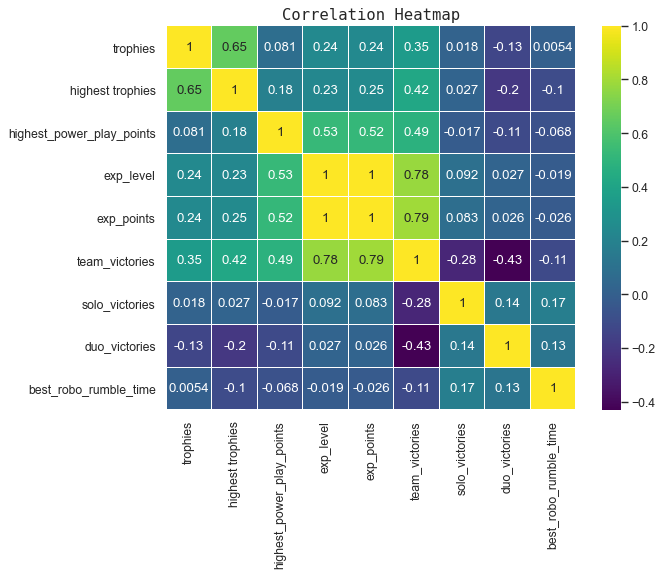

In [242]:
correlation_table = df.loc[:, ~df.columns.isin(['tag', 'brawlers', 'name', 'name_color', 'club_tag', 'club_name', 'is_qualified_from_championship_challenge', 'best_time_as_big_brawler'])].corr()
fig = plt.figure(figsize=(8,6), dpi=80)
ax = fig.add_axes([0,0,0.8,0.8])
sns.heatmap(data=correlation_table, cmap='viridis', linewidths=0.01, annot=True)
ax.set_title(label='Correlation Heatmap', fontfamily='monospace', fontsize=14)
plt.show()

<h4>Insights:</h4>
<ul>
    <li>
        The higher correlation between <i>trophies</i> and <i>highest trophies</i> makes sense here:
        <br>
        As the top players are constantly pushing their brawlers to increase their leaderboard rank, 
        a higher current trophy count means it is likely that they will soon break their previous highest trophy
        record
    </li>
    <li>
        However, for the typical Brawl Stars player who isn't actively trying to break their own records, this most likely would not be the case.
    </li>
    <li>
        Lastly, we see a correlation of nearly 80% between <i>team_victories</i> and <i>exp_points</i>. 
        As we will see later on, team modes tend to be much more popular than non-team modes. Therefore, although
        players also gain xp from non-team modes, they are not as relevant since they don't contribute as much
        to the player's overall xp level.
    </li>
</ul>

<i>Q: Which brawlers have the most trophies on average?</i>

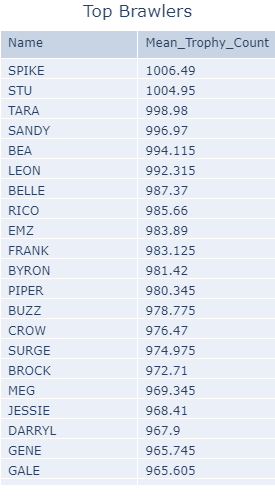

In [243]:
trophies_by_brawler = [] # Array of trophy counts for each brawler 
power_level_by_brawler = [] # Array of power levels for each brawler
for x in range(0, len(client.get_brawlers())):
    temp = [client.get_brawlers()[x]['name']]
    temp2 = [client.get_brawlers()[x]['name']]
    for player in df['brawlers']:
        try:
            temp.append(player[x]['trophies'])
            temp2.append(player[x]['power'])
        except:
            temp.append(None)
            temp2.append(None)
    trophies_by_brawler.append(temp)
    power_level_by_brawler.append(temp2)
    
def get_avg(x):
    acc = 0
    for item in x:
        if item is None:
            continue
        else:
            acc += item
    return acc/len(x)

# Store the names of each brawler and the trophy counts for each brawler across alll 200 players as a DataFrame
brawler_stats = pd.DataFrame({'Name': [x[0] for x in trophies_by_brawler], 'Mean_Trophy_Count': [x[1:] for x in trophies_by_brawler]})
new = brawler_stats.copy()
new['Power_Level'] = [x[1:] for x in power_level_by_brawler]
brawler_stats['Mean_Trophy_Count'] = brawler_stats['Mean_Trophy_Count'].apply(get_avg)
brawler_stats.sort_values('Mean_Trophy_Count', ascending=False, inplace=True)
brawler_stats.reset_index(drop=True, inplace=True)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(brawler_stats.columns), align='left'),
    cells=dict(values=[brawler_stats['Name'], brawler_stats['Mean_Trophy_Count']], align='left'))
])

fig.update_layout(title={
                    'text': 'Top Brawlers',
                    'y': 0.99,
                    'x': 0.5}, 
                  margin=dict(l=0, r=0, t=30, b=15), 
                  width=275)

fig.show("png")

<i>Q: Which clubs have the most top players?</i>

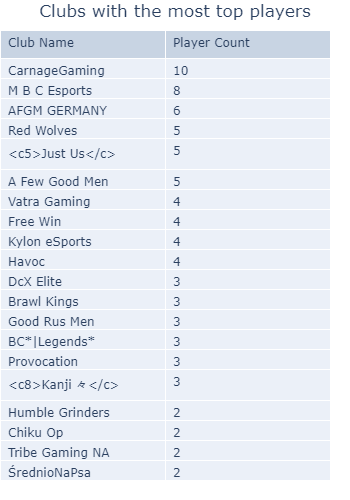

In [244]:
# Group by each club and sort the values in descending order
top_players_clubs = df.groupby('club_name', as_index=False).count().sort_values(by='exp_level', ascending=False).head(20)[['club_name', 'name']]
fig = go.Figure(data=[go.Table(
    header=dict(values=list(['Club Name', 'Player Count']), align='left'),
    cells=dict(values=[top_players_clubs['club_name'], top_players_clubs['name']], align='left'))
])

fig.update_layout(title={
                    'text': 'Clubs with the most top players',
                    'y': 0.99,
                    'x': 0.5}, 
                  margin=dict(l=0, r=20, t=30, b=0), 
                  width=350)

fig.show("png")

<i>Q: Which game modes are the most popular?</i>

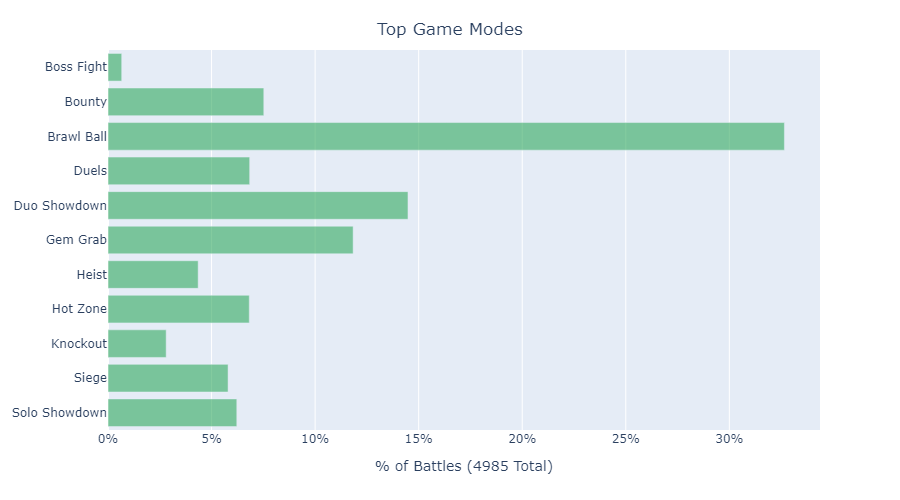

In [245]:
# Get game mode for each battle in battle log across all 200 players
game_modes = np.array([])
for x in range(len(df['battle_log'])):
    for y in range(len(df['battle_log'][x])):
        try:
            game_modes = np.append(game_modes, df['battle_log'][x][y]['battle']['mode'])
        except:
            game_modes = np.append(game_modes, None)

# Get brawler for each battle in battle log across all 200 players
brawler_selected = np.array([])
for x in range(len(df['battle_log'])):
    for y in range(len(df['battle_log'][x])):
        try:
            # If the event is solo showdown, search for the brawler picked by the top player
            if 'teams' not in dict(df['battle_log'][x][y]['battle']).keys() and 'duels' not in dict(df['battle_log'][x][y]['battle']).values():
                for player in df['battle_log'][x][y]['battle']['players']:
                    if df['tag'][x] == player['tag']:
                        brawler_selected = np.append(brawler_selected, player['brawler']['name'])
                        
            # If the event is duels, search for the first choice brawler picked by the top player
            elif 'teams' not in dict(df['battle_log'][x][y]['battle']).keys() and 'soloShowdown' not in dict(df['battle_log'][x][y]['battle']).values():
                for player in df['battle_log'][x][y]['battle']['players']:
                    if df['tag'][x] == player['tag']:
                        brawler_selected = np.append(brawler_selected, player['brawlers'][0]['name'])
                        
            # If the event is some other team event, iterate through the teams and players on each team to find
            # the brawler that the top player picked
            else:
                for team in df['battle_log'][x][y]['battle']['teams']:
                    for player in team:
                        if df['tag'][x] == player['tag']:
                            brawler_selected = np.append(brawler_selected, player['brawler']['name'])
        except:
            brawler_selected = np.append(brawler_selected, None)

# Store in new DataFrame
modes = pd.DataFrame({'Game_Mode': game_modes, 'Count': np.ones(len(game_modes)), 'Brawler': brawler_selected})
length = len(modes) - max(modes['Game_Mode'].isnull().sum(), modes['Brawler'].isnull().sum())

# Get the frequency for how often a brawler was used for each game mode - This will be used to determine the most
# popular brawlers for each game mode later on
modes = modes.groupby(['Game_Mode', 'Brawler'], as_index=False).count().sort_values(by=['Game_Mode', 'Count'], ascending=False).reset_index(drop=True)
temp = modes.copy()

# Convert from counts to percentages
modes['Count'] = modes['Count'] / length * 100
modes = modes.groupby('Game_Mode', as_index=False).sum().sort_values(by='Game_Mode', ascending=False)

# Cleaning up mode names in 'Game_Mode' column
modes.loc[modes['Game_Mode'] == 'siege', 'Game_Mode'] = 'Siege'
modes.loc[modes['Game_Mode'] == 'knockout', 'Game_Mode'] = 'Knockout'
modes.loc[modes['Game_Mode'] == 'hotZone', 'Game_Mode'] = 'Hot Zone'
modes.loc[modes['Game_Mode'] == 'heist', 'Game_Mode'] = 'Heist'
modes.loc[modes['Game_Mode'] == 'gemGrab', 'Game_Mode'] = 'Gem Grab'
modes.loc[modes['Game_Mode'] == 'duoShowdown', 'Game_Mode'] = 'Duo Showdown'
modes.loc[modes['Game_Mode'] == 'brawlBall', 'Game_Mode'] = 'Brawl Ball'
modes.loc[modes['Game_Mode'] == 'bounty', 'Game_Mode'] = 'Bounty'
modes.loc[modes['Game_Mode'] == 'bossFight', 'Game_Mode'] = 'Boss Fight'
modes.loc[modes['Game_Mode'] == 'soloShowdown', 'Game_Mode'] = 'Solo Showdown'
modes.loc[modes['Game_Mode'] == 'duels', 'Game_Mode'] = 'Duels'

fig = go.Figure()
fig.add_trace(go.Bar(x=modes['Count'],
                y=modes['Game_Mode'],
                marker_color='rgba(50, 171, 96, 0.6)',
                orientation='h'
                ))

fig.update_layout(title={
                    'text': 'Top Game Modes',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50}, 
                  xaxis=dict(
                        title=f'% of Battles ({length} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 45, 5),
                        ticktext = ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%']
                    ),
                  yaxis=dict(
                        titlefont_size=14,
                        tickfont_size=12,
                    ),
                  margin=dict(t=50, b=70),
                  width=900)

fig.show("png")


<h4>Insights:</h4>
<ul>
    <li>
        Few players play game modes that do not support teams, namely Solo Showdown and Duels. Here are some possible reasons for this:
        <br>
        <ol>
            <li>
                <b> Solo Showdown is a 10 player free for all. </b>
                <br>
                In Solo Showdown, especially at higher levels, players tend to cheat via teaming
                in order to increase their rank.
                <br>
                Therefore, this game mode becomes less skill-based and more luck-based as it really depends on who top players
                are matched against/whether or not they want to team up.
            </li>
            <li>
                    <b> Duels is a 1v1 mode where each player selects 3 brawlers to battle in an elimination
                    format duel. </b>
                <br>
                In Duels, it is difficult to increase the rank of a specific brawler, since the rewards are spread
                over multiple brawlers. Picking the same brawler multiple times is high risk, compared to a normal team game
                where the more important factor is chemistry among team members.
            </li>
        </ol>
    <br>
    <li>
        Additionally, few top players play Boss Fight. This makes sense: <i>Boss Fight awards players with tokens but not trophies!</i>
        <br>
        Therefore, it is not an effective use of time for top players to play boss fight, as they can with both trophies
        (needed to increase their rank) and tokens (used to upgrade their brawlers) from other game modes.
    </li>
    <br>
    <li>
        Lastly, Brawl Ball is a mode that requires great synergy within each team, as even small mistakes can cause a team
        to quickly become overwhelmed as the opposing team rushes in to score a goal.
        As a high skill game mode, it is great for top players looking to increase their rank: They can organize well-balanced teams and plan strategies ahead of time to effectively utilize the strengths of each team member.
    </li>
</ul>
    


<i>Q: Which brawlers are the most popular for each game mode?</i>

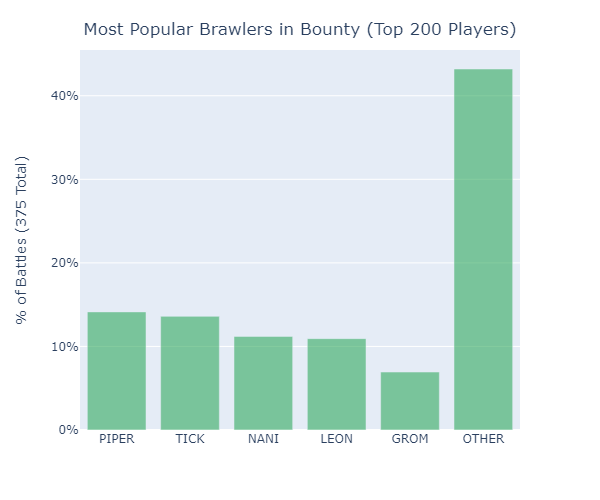

In [246]:
# Get the top 5 brawlers for each game mode
modes2 = temp.copy().groupby('Game_Mode').head(5).reset_index(drop=True)

# Get the total count of battles for each game mode and add it to the DataFrame
sums = temp.copy().groupby('Game_Mode', as_index=False).sum()
sums = pd.concat([sums]*5, ignore_index=True).sort_values(by='Game_Mode', ascending=False).reset_index(drop=True)
modes2['Total Count'] = sums['Count']

# Get the proportion of battles where a certain brawler was used for top brawler in each game mode
modes2['% Count'] = modes2['Count'] / modes2['Total Count'] * 100

# Get the 'other' category for all other brawlers
def add_row(x):
    x = x.reset_index(drop=True)
    other_category_count = x['Total Count'][0] - x['Count'][0] - x['Count'][1] - x['Count'][2] - x['Count'][3] - x['Count'][4]
    row = x.iloc[-1]
    row['Count'] = other_category_count
    row['Brawler'] = 'OTHER'
    row['% Count'] = row['Count'] / row['Total Count'] * 100
    x = x.append(row)
    return x

# Add it to the DataFrame
modes2 = modes2.groupby('Game_Mode').apply(add_row)

length3 = modes2.loc[modes2['Game_Mode'] == 'bounty']['Total Count'][0]
bounty = modes2[modes2['Game_Mode'] == 'bounty']

fig = go.Figure()
fig.add_trace(go.Bar(x=bounty['Brawler'], y=bounty['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Bounty (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length3} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

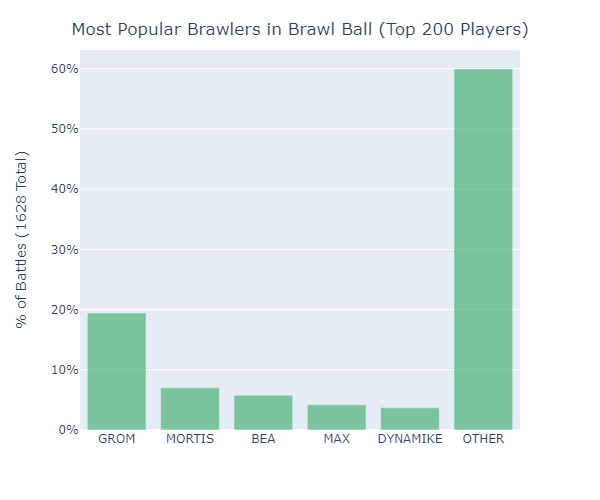

In [247]:
length4 = modes2.loc[modes2['Game_Mode'] == 'brawlBall']['Total Count'][0]
brawlBall = modes2[modes2['Game_Mode'] == 'brawlBall']

fig = go.Figure()
fig.add_trace(go.Bar(x=brawlBall['Brawler'], y=brawlBall['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Brawl Ball (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length4} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

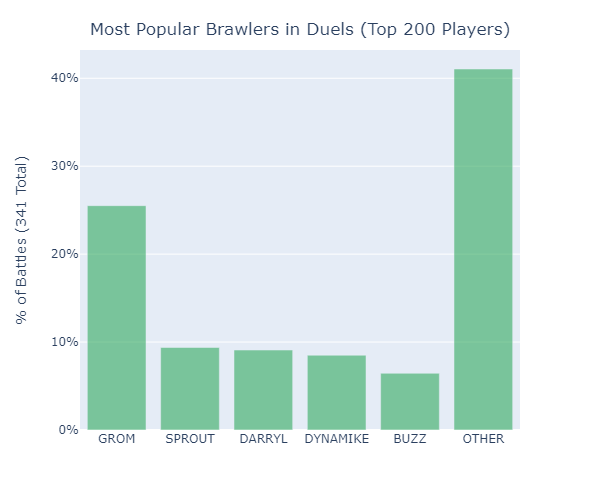

In [248]:
length5 = modes2.loc[modes2['Game_Mode'] == 'duels']['Total Count'][0]
duels = modes2[modes2['Game_Mode'] == 'duels']

fig = go.Figure()
fig.add_trace(go.Bar(x=duels['Brawler'], y=duels['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Duels (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length5} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

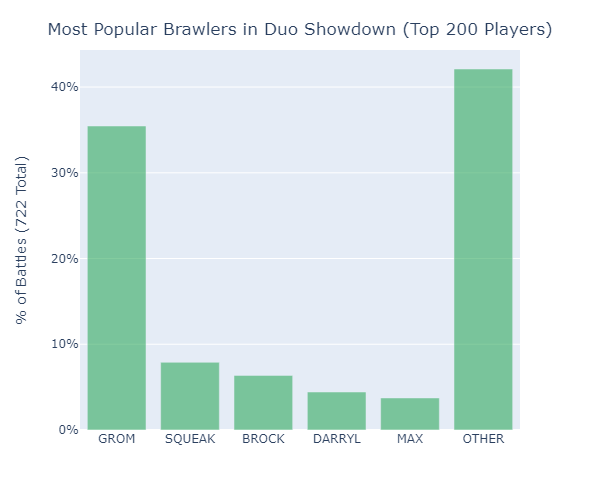

In [249]:
length6 = modes2.loc[modes2['Game_Mode'] == 'duoShowdown']['Total Count'][0]
duoShowdown = modes2[modes2['Game_Mode'] == 'duoShowdown']

fig = go.Figure()
fig.add_trace(go.Bar(x=duoShowdown['Brawler'], y=duoShowdown['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Duo Showdown (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length6} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

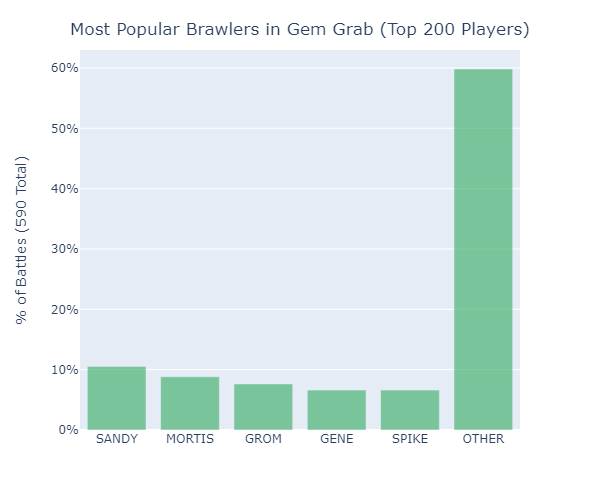

In [250]:
length7 = modes2.loc[modes2['Game_Mode'] == 'gemGrab']['Total Count'][0]
gemGrab = modes2[modes2['Game_Mode'] == 'gemGrab']

fig = go.Figure()
fig.add_trace(go.Bar(x=gemGrab['Brawler'], y=gemGrab['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Gem Grab (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length7} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

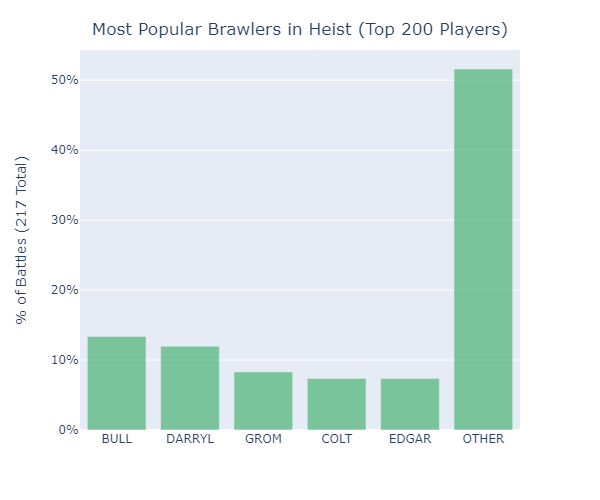

In [251]:
length8 = modes2.loc[modes2['Game_Mode'] == 'heist']['Total Count'][0]
heist = modes2[modes2['Game_Mode'] == 'heist']

fig = go.Figure()
fig.add_trace(go.Bar(x=heist['Brawler'], y=heist['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Heist (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length8} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

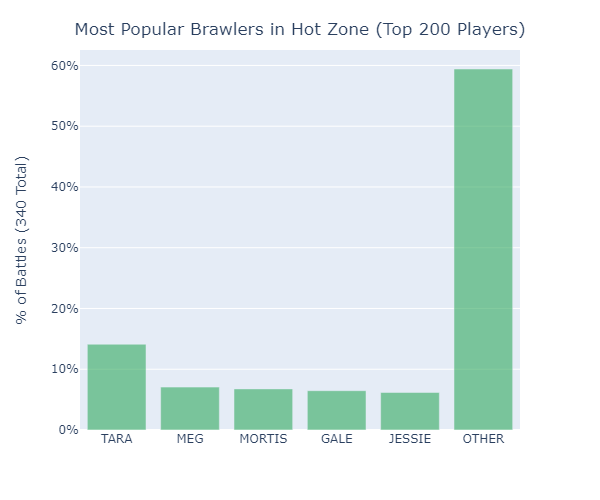

In [252]:
length9 = modes2.loc[modes2['Game_Mode'] == 'hotZone']['Total Count'][0]
hotZone = modes2[modes2['Game_Mode'] == 'hotZone']

fig = go.Figure()
fig.add_trace(go.Bar(x=hotZone['Brawler'], y=hotZone['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Hot Zone (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length9} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

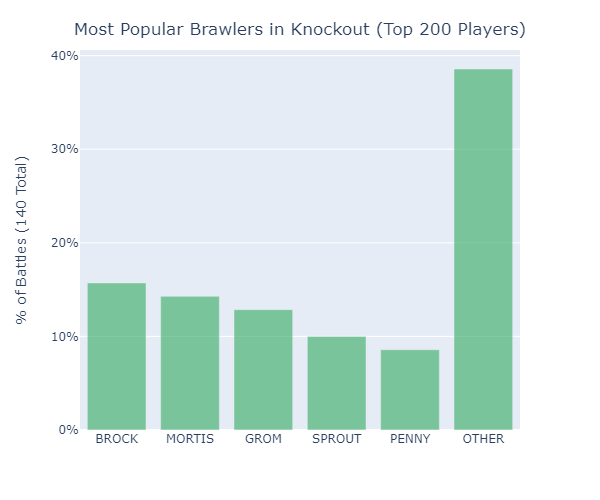

In [253]:
length12 = modes2.loc[modes2['Game_Mode'] == 'knockout']['Total Count'][0]
knockout = modes2[modes2['Game_Mode'] == 'knockout']

fig = go.Figure()
fig.add_trace(go.Bar(x=knockout['Brawler'], y=knockout['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Knockout (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length12} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

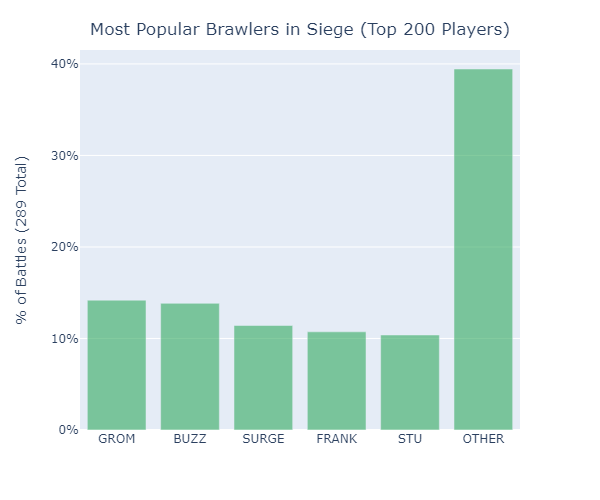

In [254]:
length1 = modes2.loc[modes2['Game_Mode'] == 'siege']['Total Count'][0]
siege = modes2[modes2['Game_Mode'] == 'siege']

fig = go.Figure()
fig.add_trace(go.Bar(x=siege['Brawler'], y=siege['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Siege (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length1} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 50, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

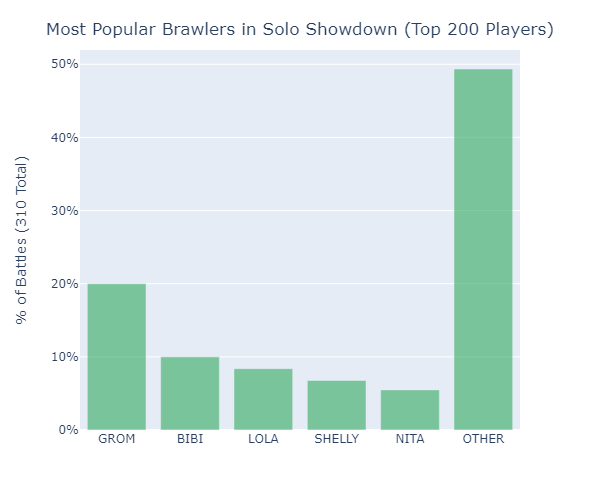

In [255]:
length2 = modes2.loc[modes2['Game_Mode'] == 'soloShowdown']['Total Count'][0]
soloShowdown = modes2[modes2['Game_Mode'] == 'soloShowdown']

fig = go.Figure()
fig.add_trace(go.Bar(x=soloShowdown['Brawler'], y=soloShowdown['% Count'], marker_color='rgba(50, 171, 96, 0.6)'))

fig.update_layout(title={
                    'text': 'Most Popular Brawlers in Solo Showdown (Top 200 Players)',
                    'xanchor': 'center',
                    'yanchor': 'bottom',
                    'y': 0.93,
                    'x': 0.50},
                  yaxis=dict(
                        title=f'% of Battles ({length2} Total)',
                        titlefont_size=14,
                        tickfont_size=12,
                        tickvals = np.arange(0, 70, 10),
                        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
                    ),
                 margin=dict(t=50, b=70),
                 width=600)

fig.show("png")

<h4>Q: Is Brawl Stars pay to win?</h4>
<p>-One of the main criticisms of games made by Supercell is that they are often labelled as "pay to win" rather than skill based.
Pay to win games allow players to purchase items and upgrades to give them an advantage over free to play players.</p>

<p>-Power levels in Brawl Stars determine the attack damage, hp and super attack damage of a brawler. Therefore, I 
wanted to see if there was a significant correlation between the average power level of a brawler and the average
trophy count of a brawler across all top 200 players.</p>

<i>Note: Naturally, correlation does not imply causation so the following regression cannot prove Brawl Stars is pay
to win. However, if it is not pay to win, there should be no correlation between the variables described previously.</i>

The correlation between the Mean Trophy Count and the Mean Power Level across all brawlers in the game is 0.7957097993413729.


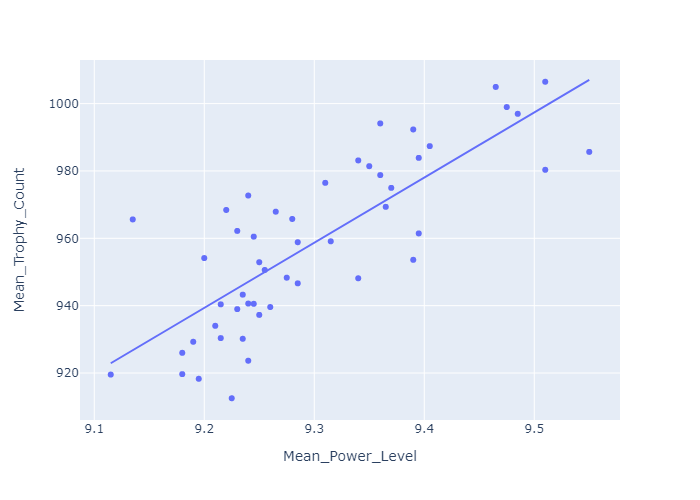

In [256]:
new1 = new.copy()

mean_trophy_count = []
mean_power_level = []
for x in new.iterrows():
    mean1 = get_avg(x[1]['Mean_Trophy_Count'])
    mean2 = get_avg(x[1]['Power_Level'])
    mean_trophy_count.append(mean1)
    mean_power_level.append(mean2)

new1['Mean_Trophy_Count'] = mean_trophy_count  
new1['Power_Level'] = mean_power_level
new1.rename(columns={'Power_Level': 'Mean_Power_Level'}, inplace=True)

# Computing outliers - Mean_Trophy_Count
q1_mean_trophy = new1['Mean_Trophy_Count'].quantile(q=0.25)
q3_mean_trophy = new1['Mean_Trophy_Count'].quantile(q=0.75)
IQR_mean_trophy = q3_mean_trophy - q1_mean_trophy
lower_fence_mean_trophy = q1_mean_trophy - (1.5 * IQR_mean_trophy)
upper_fence_mean_trophy = q3_mean_trophy + (1.5 * IQR_mean_trophy)

# Computing outliers - Mean_Power_Level
q1_mean_power_level = new1['Mean_Power_Level'].quantile(q=0.25)
q3_mean_power_level = new1['Mean_Power_Level'].quantile(q=0.75)
IQR_mean_power_level = q3_mean_power_level - q1_mean_power_level
lower_fence_mean_power_level = q1_mean_power_level - (1.5 * IQR_mean_power_level)
upper_fence_mean_power_level = q3_mean_power_level + (1.5 * IQR_mean_power_level)

# Ensure data points are within fences for each column
new1 = new1[(new1['Mean_Trophy_Count'] >= lower_fence_mean_trophy) &
            (new1['Mean_Trophy_Count'] <= upper_fence_mean_trophy) &
            (new1['Mean_Power_Level'] >= lower_fence_mean_power_level) &
            (new1['Mean_Power_Level'] <= upper_fence_mean_power_level)]

print('The correlation between the Mean Trophy Count and the Mean Power Level across all brawlers' +
      f' in the game is {new1.corr().iloc[0,1]}.')

import plotly.express as px

fig = px.scatter(new1, x="Mean_Power_Level", y="Mean_Trophy_Count", trendline="ols")
fig.show("png")


<i>Q: Are top players also in the top clubs?</i>

The correlation between a player's rank and their club's rank across all players in the game is 0.12866420593694122.


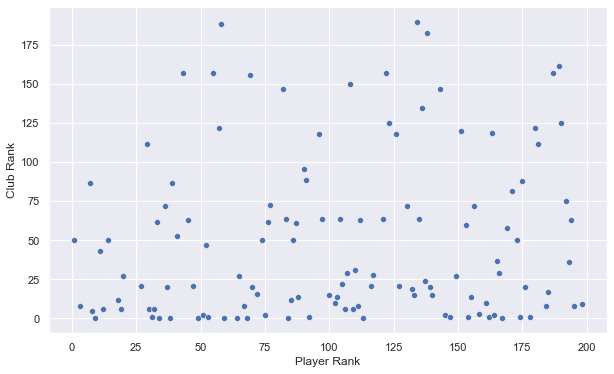

In [263]:
top_club_names = []
for top_clubs in client.get_rankings(ranking='clubs'):
    top_club_names.append(top_clubs['name'])

club_ranks_for_top_players = []
for club in range(len(df)):
    club_name = df['club_name'][club]
    if club_name in top_club_names:
        club_ranks_for_top_players.append(top_club_names.index(club_name))
    else:
        club_ranks_for_top_players.append(None)

df['club_rank'] = club_ranks_for_top_players
indices = []

for x in range(len(club_ranks_for_top_players)):
    if club_ranks_for_top_players[x] is not None:
        indices.append(x)
    else:
        indices.append(None)

player_vs_club_rank = pd.DataFrame({'Player Rank': indices, 'Club Rank': df['club_rank']})
print('The correlation between a player\'s rank and their club\'s rank across all players' +
      f' in the game is {player_vs_club_rank.corr().iloc[0, 1]}.')

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_vs_club_rank, x='Player Rank', y='Club Rank')
sns.set_theme()

<h4>Insights:</h4>
<ul>
    <li>
    With a correlation of only ~0.129, there is no sufficient evidence of a linear association between a player's rank and their corresponding club rank 
        <br>
        <span style="background-color: #FFFF00">(A high ranking player is not necessarily in a high ranking club!)</span>
    </li>
    <br>
    <li>
        We know from our earlier analysis that top brawlers generally prefer team modes rather than solo modes such as
        Duels/Solo Showdown. Therefore, it likely isn't the case that they aren't in a club or aren't in a top club because
        they prefer playing solo game modes.
    </li>
    <br>
    <li>
            A likely reason for top players not necessarily being in a top club or in any club is that players can send other   friend requests to other players in the game, so if they are
        already friends with many other active top players, they don't need to join a club with other top players
    </li>
</ul>